In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 상관분석
* 두 변수 x, y가 있을때 두 변수가 서로 어떤 관계에 있는지 분석하는 과정
* 보통 2개의 등간/비율 척도 변수를 분석할때 
    + 우선적으로 산점도를 그려 변수간의 관계를 시각화 한 후 상관계수를 계산

* 변수들 관계 예
    + 키x가 클수록 몸무게y도 증가하는가?
    + 교육을 많이 받으면 수입도 증가하는가?
    + 광고를 많이 하면 판매량이 증가하는가?
    + 운동을 많이 하면 몸무게는 감소하는가?
    + 담배를 줄이면 심혈관 질병 발생비율은 낮아지는가?

* 두 변수 정의 : 독립변수, 종속변수
    + 독립변수 : 종속변수를 추정하거나 예측하는데 토대를 제공 (원인/설명 변수)
    + 종속변수 : 예측되거나 추정되는 변수, 독립변수의 특정값에 대한 결과를 의미 (결과/반응 변수)
    + 독립변수와 종속변수는 인과관계를 가질 가능성이 높음 (원인-결과 관계)
    + 즉, 변수 X가 다른 변수 Y에 영향을 주는 관계를 의미


## 광고비와 매출액간의 상관관계

In [2]:
# A회사의 광고비 지출이 매출에 어느정도 영향을 주는지 파악하기 위해 
# 광고비와 매출액간의 관계를 조사한다고 가정
# 광고비와 매출액간의 연관성 파악을 위해 산점도로 시각화해 보세요
ad = [13,8,10,15,12,15,14,15,17,19,20,21,22,21,25]
sales = [94,70,90,100,95,100,85,95,105,105,110,105,104,105,121]

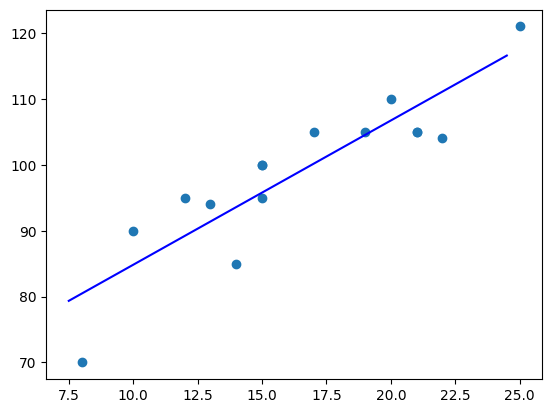

In [8]:
a, b = np.polyfit(ad,sales,1).round(2)
a,b

plt.scatter(ad,sales)

x = np.arange(7.5,25, 0.5)
y = a*x + b     # 예측을 위한 직선방정식
plt.plot(x,y,'b')
plt.show()

# 상관관계correlation
* 두 변수 사이에 서로 주고 받는 관계가 있음
* 선형관계 여부와 연관성이 존재
  + 양/음의 상관관계, 무 상관관계등 3가지 존재
* 각 변수의 관계를 기울기에 따라 양/음의 상관계수로 분류함
* 상관관계를 나타내는 정도를 상관계수라 하는데
* 한편, 강력하게 관계가 나타나기도 하지만 아리까리하게 있는듯 없는 듯한 관계도 있을수 있음
* 이러한 차이를 명확하게 하기 위해 상관계수를 사용
  + 피어슨 상관계수

# 공분산covariance
* 두 변수가 각 평균으로부터 떨어져 있는 정도를 구한 후 표본의 갯수로 나누어 계산한 것

* 공분산에서는 $x$와 $y$의 편차들을 서로 곱해주는데, 그 이유는 두 변수간의 관계가 편차들의 곱에 반영이 되기 때문.

* 하나의 $x$값이 평균보다 클 때 $y$도 평균보다 크면 두 편차의 곱은 양수.
* 반면 한 $x$값이 평균보다 클 때 $y$는 평균보다 작으면 편차의 곱으은 음수가 되는 점을 이용한 것.
* 곱한 값들을 모두 더해 양의 관계가 우세한지 음의 관계가 우세한지 측정.

* 결과가 양수 또는 음수로 나올수 있음
  + 양수 -> 양의 상관관계 있음 ($x$증가->y증가)
  + 음수 -> 음의 상관관계 있음 ($x$증가->y감소)


In [10]:
# 각 변수의 평균을 구함
amean = np.mean(ad)
smean= np.mean(sales)

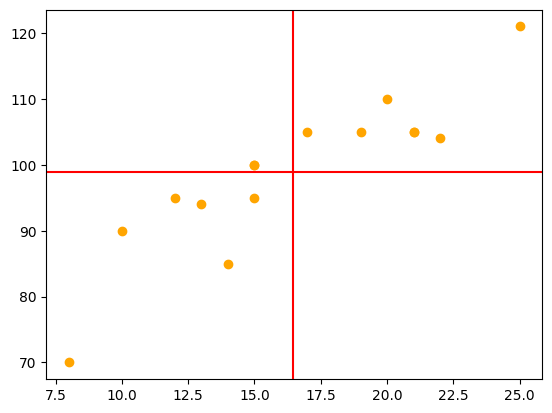

In [14]:
plt.scatter(ad,sales,color='orange')

# 평균을 기준으로 수직선/수평선을 그림 : axvline, axhline
plt.axvline(x=amean, color='red')
plt.axhline(y=smean, color='red')
            

plt.show()

### 공분산 계산
+ cov(독립변수, 종속변수)
+ 결과가 양 : 양의 상관관계가 있음
+ 경과가 음 : 음의 상관관계가 있음

In [15]:
np.cov(ad,sales)[0,1]

50.24761904761905

# 상관계수
* 두 변수가 함께 변하는 정도를 -1~1 범위의 수치로 나타낸 것
* 단위로 인한 공분산의 차이를 어느 정도 보완해 줌
* 일반적으로 칼피어슨이 개발한 피어슨 상관계수를 사용함
* numpy의 corrcoef 함수를 사용함

## 상관계수 범위에 따른 상관정도 해석
* -1.0 ~ -0.7 : 매우 강한 음의 상관관계 있음
* -0.7 ~ -0.3 : 강한 음의 상관관계 있음
* -0.3 ~ -0.1 : 약한 음의 상관관계 있음
* -0.1 ~ 0.1 : 상관관계 없음
* 0.3 ~ 0.1 : 약한 양의 상관관계 있음
* 0.7 ~ 0.3 : 강한 양의 상관관계 있음
* 1.0 ~ 0.7 : 매우 강한 양의 상관관계 있음

## 상관계수의 종류
* pearson   : 기본적으로 등간/비율척도 변수에 사용 (선형적 관계)
* spearman  : 서열척도 변수에 사용, 비선형적 관계
* kendall   : 서열척도 변수에 사용, 비선형적 관계 (표본수가 적을때 더 유용)

In [19]:
# 상관계수 계산 : corrcoef
np.corrcoef(ad,sales)[0,1]

0.8879209022406115

### 놀이기구와 전체 만족도에 대한 상관관계 분석

In [28]:
ent = pd.read_csv('https://raw.githubusercontent.com/siestageek/datasets/master/csv/parks.csv')
ent.head()

,weekend,num.child,distance,rides,games,wait,clean,overall
0,yes,0,114.648259,87,73,60,89,47
1,yes,2,27.014097,87,78,76,87,65
2,no,1,63.300975,85,80,70,88,61
3,yes,0,25.909931,88,72,66,89,37
4,no,4,54.718307,84,87,74,87,68


In [64]:
np.cov(ent.wait,ent.overall)[0,1]

97.93269739478957

In [63]:
np.corrcoef(ent.wait,ent.overall)[0,1]

0.5726216586817835

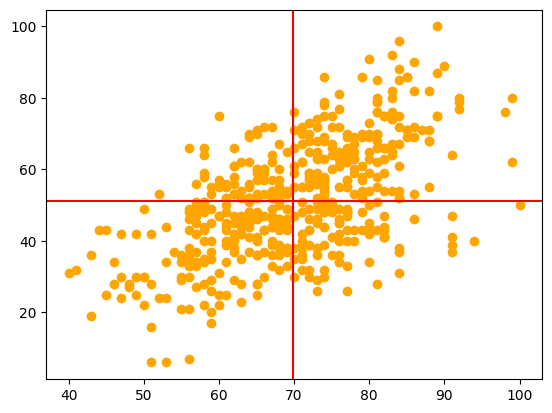

In [78]:
amean = np.mean(ent.wait)
smean= np.mean(ent.overall)

plt.scatter(ent.wait,ent.overall,color='orange')

plt.axvline(x=amean, color='red')
plt.axhline(y=smean, color='red')
            

plt.show()

### 구매자 연령과 판매이익간의 상관관계 분석

In [93]:
apple = pd.read_csv('https://raw.githubusercontent.com/siestageek/datasets/master/txt/applewood.txt',sep=" ")
#apple = pd.DataFrame(apple)

In [94]:
# 분석에 불필요한 문자 제거
age = apple.Age
profit = apple.Profit

profit = profit.replace(',','', regex=True).replace('\$','', regex=True).astype(int)
age

0      21
1      23
2      24
3      25
4      26
       ..
175    69
176    70
177    72
178    72
179    73
Name: Age, Length: 180, dtype: int64

In [95]:
np.cov(age,profit)[0,1]

1774.4888268156426

In [96]:
np.corrcoef(age,profit)[0,1]

0.26152899109728944

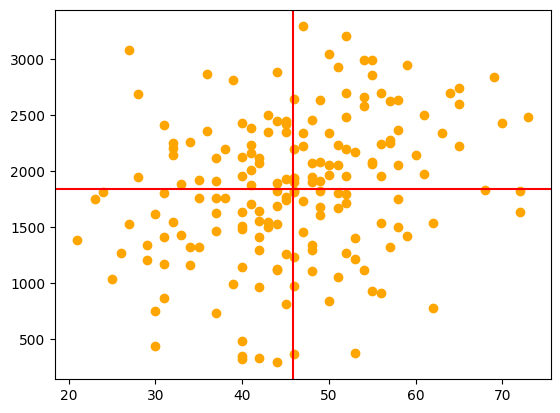

In [98]:
amean = np.mean(age)
smean= np.mean(profit)

plt.scatter(age,profit,color='orange')

plt.axvline(x=amean, color='red')
plt.axhline(y=smean, color='red')
            

plt.show()

### 판촉 전화횟수에 따라 판매량 변화가 있는지 알아보시오

In [24]:
p =  [96, 40, 104, 128, 164, 76, 72, 80, 36, 84, 180, 132, 120, 44, 84]
s = [41, 41, 51, 60, 61, 29, 39, 50, 28, 43, 70, 56, 45, 31, 30]

In [46]:
np.cov(p,s)[0,1]

476.57142857142856

In [47]:
np.corrcoef(p,s)[0,1]

0.8646317910740129

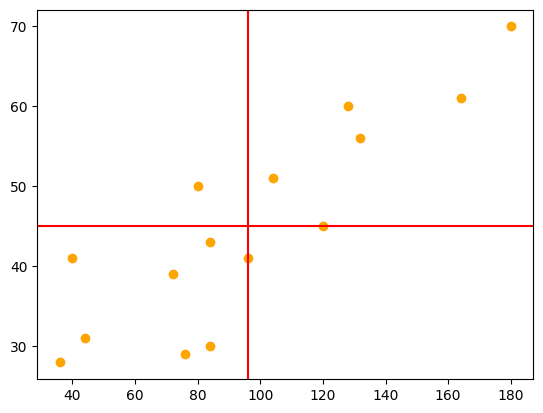

In [79]:
amean = np.mean(p)
smean= np.mean(s)

plt.scatter(p,s,color='orange')

plt.axvline(x=amean, color='red')
plt.axhline(y=smean, color='red')
            

plt.show()

### 총 지불금액별 팁에 대한 상관관계 분석

In [103]:
tips = sns.load_dataset('tips')
tips.info()

tb = tips.total_bill
tt = tips.tip

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [104]:
print(np.cov(tb,tt)[0,1])
print(np.corrcoef(tb,tt)[0,1])

8.323501629224854
0.6757341092113645


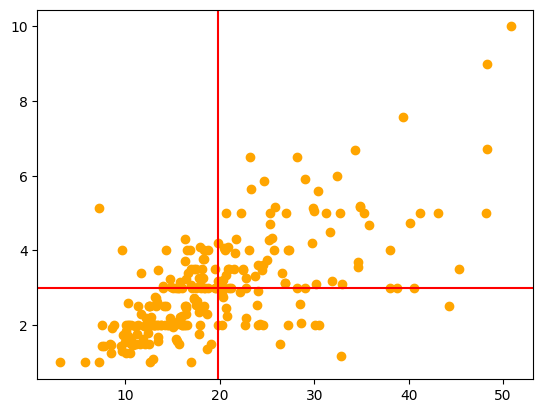

In [105]:
amean = np.mean(tb)
smean= np.mean(tt)

plt.scatter(tb,tt,color='orange')

plt.axvline(x=amean, color='red')
plt.axhline(y=smean, color='red')
            

plt.show()

### 다이아몬드 캐럿당 가격에 대한 상관관계 분석

In [108]:
diamond = sns.load_dataset('diamonds')

dc = diamond.carat
dp = diamond.price

In [109]:
print(np.cov(dc,dp)[0,1])
print(np.corrcoef(dc,dp)[0,1])

1742.7653642651176
0.921591301193476


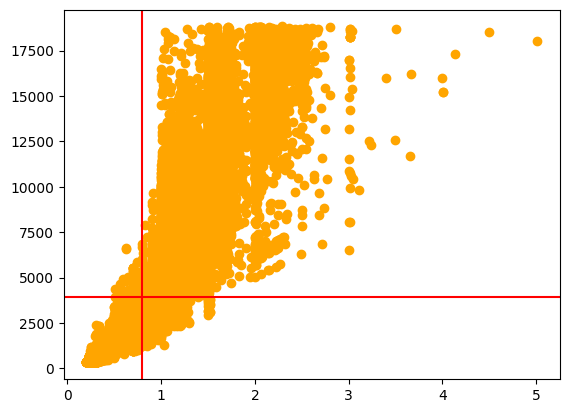

In [110]:
amean = np.mean(dc)
smean= np.mean(dp)

plt.scatter(dc,dp,color='orange')

plt.axvline(x=amean, color='red')
plt.axhline(y=smean, color='red')
            

plt.show()